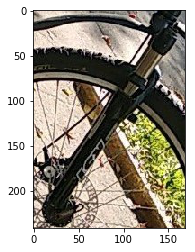

Raw vector tensor([[ -1.5449,  17.1737,  29.6473,  -3.8403,   5.2764,  -8.5386,
          -8.5780,  -6.0409,  -9.3157,  -6.9371]])
Predicted:   fork


In [21]:
from PIL import Image
from network import *
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt 

base_path = '/mnt/11DCF430046E321B/CV'
path = base_path + '/fmb'
weigths_path = base_path + "/pytorch_data/networks/fmb.weights"

# Create net and load weigths
net = Net()
net.load_state_dict(torch.load(weigths_path))

# Load and show one image
img_pil = Image.open(path + '/fork/10.jpeg')
plt.imshow(img_pil)
plt.show()

# Convert image to tensor to same dimensions as all images in training set
data_transform = transforms.Compose([
        transforms.Resize([32,32]),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

img_tensor = data_transform(img_pil)

# Set size of a batch
img_tensor.unsqueeze_(0)

# Run classifier
outputs = net(img_tensor)

#Display result
print("Raw vector",outputs)
_, predicted = torch.max(outputs, 1)

# Get classes
trainset = datasets.ImageFolder(base_path + '/fmb', transform=data_transform)
classes = trainset.classes
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))